## Task 2: Exploratory Data Analysis (EDA)

## 1. Data Structure Overview

In [1]:
import pandas as pd
# Load sentiment-labeled dataset
df = pd.read_csv("test_with_sentiment.csv")
# Basic structure
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (2191, 5)

Data types:
Subject            object
body               object
date               object
from               object
sentiment_label    object
dtype: object

Missing values per column:
Subject            0
body               0
date               0
from               0
sentiment_label    0
dtype: int64


## 2. Sentiment Distribution

sentiment_label
Positive    1528
Neutral      511
Negative     152
Name: count, dtype: int64


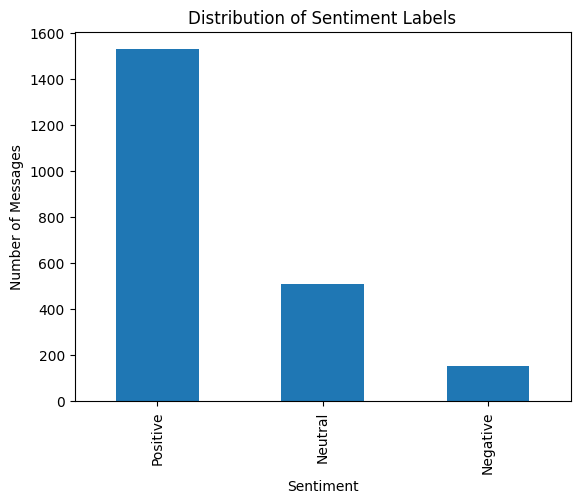

In [2]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment_label'].value_counts()

print(sentiment_counts)

sentiment_counts.plot(kind='bar')
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Number of Messages")
plt.show()


## 3. Time-Based Analysis

### Date Column

In [3]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year_month'] = df['date'].dt.to_period('M')

### Sentiment Trends Over Time

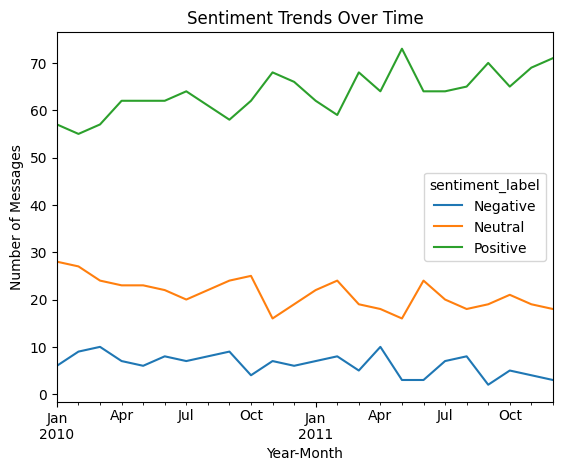

In [4]:
sentiment_over_time = (
    df.groupby(['year_month', 'sentiment_label'])
    .size()
    .unstack(fill_value=0)
)

sentiment_over_time.plot()
plt.title("Sentiment Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Messages")
plt.show()


## 4. Employee-Level Activity Analysis

### Messages per Employee

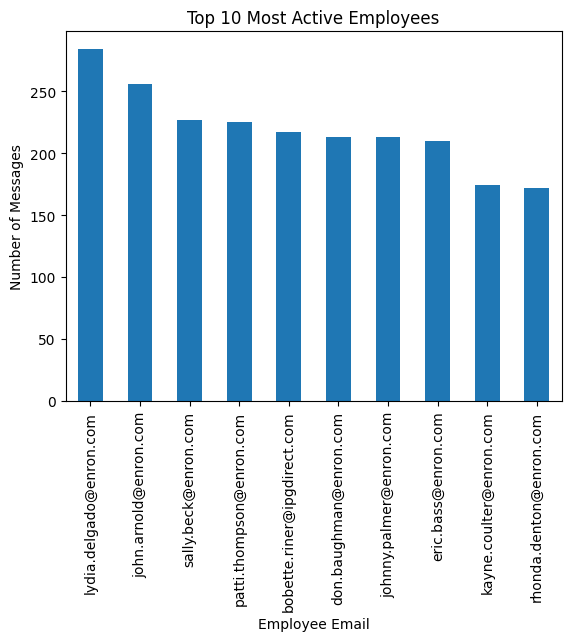

In [5]:
employee_message_count = df['from'].value_counts().head(10)

employee_message_count.plot(kind='bar')
plt.title("Top 10 Most Active Employees")
plt.xlabel("Employee Email")
plt.ylabel("Number of Messages")
plt.show()

## 5. Negative Sentiment Concentration (Early Risk Signal)

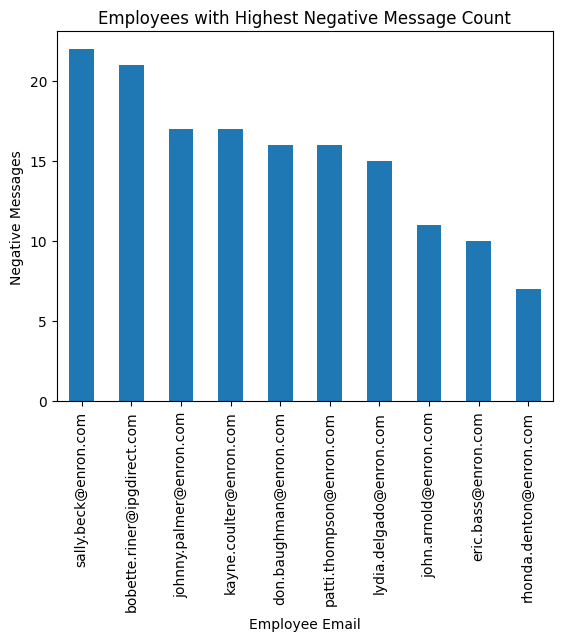

In [6]:
negative_messages = df[df['sentiment_label'] == 'Negative']

negative_by_employee = negative_messages['from'].value_counts().head(10)

negative_by_employee.plot(kind='bar')
plt.title("Employees with Highest Negative Message Count")
plt.xlabel("Employee Email")
plt.ylabel("Negative Messages")
plt.show()

## 6. Additional Observations & Anomalies

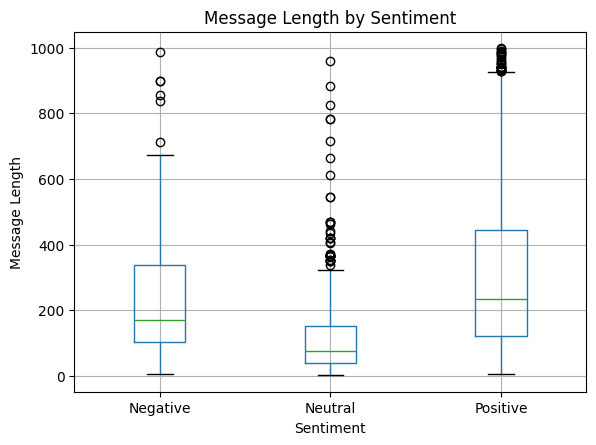

In [8]:
df['message_length'] = df['body'].str.len()

df.boxplot(column='message_length', by='sentiment_label')
plt.title("Message Length by Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Message Length")
plt.show()